In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import copy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2

from decompose_compose.pipeline import *
from utils.results_visualization import save_results
from utils.paste import *

warnings.filterwarnings("ignore")

[Taichi] version 1.7.0, llvm 15.0.4, commit 2fd24490, linux, python 3.11.7


[I 02/03/24 00:31:46.903 72068] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout
2024-02-03 00:31:48.438587: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-03 00:31:48.459628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 00:31:48.459652: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 00:31:48.460345: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for p

In [3]:
healthy_root = './data_example/health/healthy/'
rotten_root = './data_example/health/rotten/'

In [4]:
healthy_files = os.listdir(healthy_root)
healthy_files = [os.path.join(healthy_root, f) for f in healthy_files if ('.jpg' in f)]
healthy_images = [plt.imread(f).astype(np.uint8) for f in healthy_files]

rotten_files = os.listdir(rotten_root)
rotten_files = [os.path.join(rotten_root, f) for f in rotten_files if ('.jpg' in f)]
rotten_images = [plt.imread(f).astype(np.uint8) for f in rotten_files]

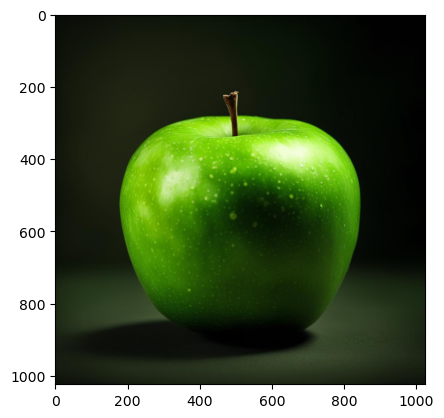

In [5]:
plt.imshow(healthy_images[0])

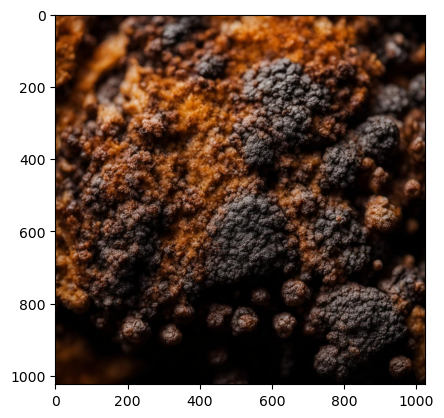

In [6]:
plt.imshow(rotten_images[1])

In [7]:
spoil = rotten_images[1]
mask = random_mask(spoil)
result = paste_object_poisson(healthy_images[1], spoil, mask, x=0, y=0)

[Taichi] Starting on arch=cuda


[W 02/03/24 00:31:51.063 72068] [offload.cpp:emit_struct_for@243] Specified block dim 1024 is bigger than SNode element size 64. Clipping.

[W 02/03/24 00:31:51.146 72068] [offload.cpp:emit_struct_for@243] Specified block dim 1024 is bigger than SNode element size 64. Clipping.

[W 02/03/24 00:31:51.146 72068] [offload.cpp:emit_struct_for@243] Specified block dim 1024 is bigger than SNode element size 3. Clipping.



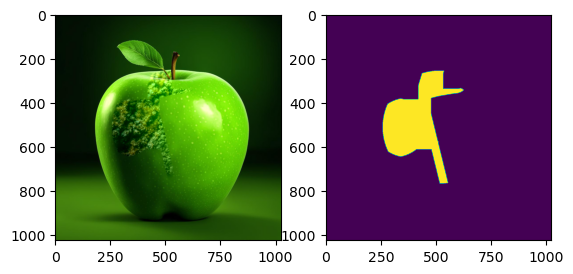

In [8]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(result)
ax[1].imshow(mask)
plt.show()